## Przygotowanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

In [2]:
file = "ks_projects_201801.csv"
filepath = os.path.join(os.path.abspath(""), file)

In [3]:
df = pd.read_csv(filepath)

In [4]:
# Usunięcie wartości NaN
df = df.dropna()

# Ujednolicenie kolumn z datami, przekształcenie na format datetime
df['deadline_new'] = pd.to_datetime(df['deadline']).dt.date
df['launched_new'] = pd.to_datetime(df['launched']).dt.date

# Obliczenie czasu trwania projektów, oczyszczenie danych - przekształcenie na typ int
df['duration'] = df['deadline_new'] - df['launched_new']
df['duration'] = df['duration'].map(lambda x: int(str(x).split(" ")[0]))

# Wyodrębnienie dwóch stanów projektów: successful = 1, pozostałe = 0
df["state_new"] = df["state"].map(lambda x: 1 if x == "successful" else 0 )

# Usunięcie niepotrzebnych kolumn
to_drop = ["deadline",
           "launched",
           "state",
           "usd pledged"]

df.drop(to_drop, inplace=True, axis=1)

# Połączenie Luksemburga, Belgii i Holandii w Beneluks

df["country"] = df["country"].replace(["LU", "BE"],"NL")

# Odrzucenie krajów, w których liczba projektów jest poniżej 1000

df = df[(df["country"] != "SG") 
        & (df["country"] != "JP") 
        & (df["country"] != "AT") 
        & (df["country"] != "HK")
        & (df["country"] != "NO")
        & (df["country"] != "CH")
        & (df["country"] != "IE")]

# Wyodrębnienie roku i miesiąca z danych 

df['year_launched'] = pd.DatetimeIndex(df['launched_new']).year
df['month_launched'] = pd.DatetimeIndex(df['launched_new']).month

# Usunięcie rekordów z 1970 roku

df = df[df["year_launched"] != 1970]

df.head()

,ID,name,category,main_category,currency,goal,pledged,backers,country,usd_pledged_real,usd_goal_real,deadline_new,launched_new,duration,state_new,year_launched,month_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,0,GB,0.0,1533.95,2015-10-09,2015-08-11,59,0,2015,8
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,15,US,2421.0,30000.00,2017-11-01,2017-09-02,60,0,2017,9
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,3,US,220.0,45000.00,2013-02-26,2013-01-12,45,0,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,1.0,1,US,1.0,5000.00,2012-04-16,2012-03-17,30,0,2012,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,1283.0,14,US,1283.0,19500.00,2015-08-29,2015-07-04,56,0,2015,7


## Wybór kraju

In [5]:
choice_widget = widgets.Dropdown(
                    layout={'width': 'max-content'}, 
                    options=[("Australia",'AU'),("Benelux",'NL'),("Canada",'CA'),("Denmark",'DK'),("France",'FR'),("Germany",'DE'),("Great Britain",'GB'),("Itlay",'IT'),("Mexico",'MX'),("New Zealand",'NZ'),("Spain",'ES'),("Sweden",'SE'),("United States",'US')],
                    description='Select country:',
                    style={'description_width': 'initial'})

choice_widget

Dropdown(description='Select country:', layout=Layout(width='max-content'), options=(('Australia', 'AU'), ('Be…

In [19]:
cf = df[df['country']==choice_widget.value]
cf

,ID,name,category,main_category,currency,goal,pledged,backers,country,usd_pledged_real,usd_goal_real,deadline_new,launched_new,duration,state_new,year_launched,month_launched
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,15,US,2421.0,30000.0,2017-11-01,2017-09-02,60,0,2017,9
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,3,US,220.0,45000.0,2013-02-26,2013-01-12,45,0,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,1.0,1,US,1.0,5000.0,2012-04-16,2012-03-17,30,0,2012,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,1283.0,14,US,1283.0,19500.0,2015-08-29,2015-07-04,56,0,2015,7
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,50000.0,52375.0,224,US,52375.0,50000.0,2016-04-01,2016-02-26,35,1,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,50000.0,25.0,1,US,25.0,50000.0,2014-10-17,2014-09-17,30,0,2014,9
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,1500.0,155.0,5,US,155.0,1500.0,2011-07-19,2011-06-22,27,0,2011,6
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,15000.0,20.0,1,US,20.0,15000.0,2010-08-16,2010-07-01,46,0,2010,7
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,15000.0,200.0,6,US,200.0,15000.0,2016-02-13,2016-01-13,31,0,2016,1


## Czy użytkownik chce poznać szanse na sfinansowanie swojego projektu?

In [20]:
yes_no_widget = widgets.ToggleButtons(
                    options=["Yes", "No"],
                    description="Do you want to know what are the chances for your project to succeed?",
                    disabled=False,
                    style={"description_width": "initial"},
                    button_style="info", # 'success', 'info', 'warning', 'danger' or ''
                    tooltips=["Yes, I do", "No, I don't"],
                )
yes_no_widget

ToggleButtons(button_style='info', description='Do you want to know what are the chances for your project to s…

## Wybór parametrów projektu przez użytkownika

### 1. Kategoria

In [21]:
main_cat = list(cf["main_category"].unique())
main_cat_widget = widgets.Dropdown(
                    options=main_cat,
                    value=main_cat[0],
                    description="Main category in {}".format(choice_widget.value),
                    style={"description_width": "initial"},
                    disabled=False,
                )
main_cat_widget

Dropdown(description='Main category in US', options=('Film & Video', 'Music', 'Food', 'Design', 'Crafts', 'Gam…

### 2. Podkategoria

In [22]:
main_cat_select = cf[cf["main_category"] == main_cat_widget.value]
cat = list(main_cat_select["category"].unique())

cat_widget = widgets.Dropdown(
                options=cat,
                value=cat[0],
                description="Category",
                style={"description_width": "initial"},
                disabled=False,
            )
cat_widget

Dropdown(description='Category', options=('Music', 'Indie Rock', 'Pop', 'Rock', 'Jazz', 'Electronic Music', 'M…

### 3. Czas trwania zbiórki

In [23]:
duration_widget = widgets.IntSlider(
                    value=0,
                    min=cf["duration"].min(),
                    max=cf["duration"].max(),
                    step=1,
                    description= "How many days is the fundraising going to last?",
                    disabled=False,
                    continuous_update=False,
                    orientation="horizontal",
#                     style={"description_width": "initial"},
#                     layout={'width': 'max-content'},
#                     readout=True,
#                     readout_format="d"
                )

duration_widget

IntSlider(value=1, continuous_update=False, description='How many days is the fundraising going to last?', max…

### 4. Kwota zbiórki

In [11]:
money_widget = widgets.FloatText(
                    value=10,
                    description="How much money do you want to collect?($)",
                    style={"description_width": "initial"},
                    layout={'width': 'max-content'},
                    disabled=False
                )

money_widget

FloatText(value=10.0, description='How much money do you want to collect?($)', layout=Layout(width='max-conten…

## Oszacowanie prawdopodobieństwa, że projekt złożony w wybranej kategorii zostanie sfinansowany

In [24]:
# Projekty, które zostały sfinansowane w wybranej kategorii

mcat_s = cf[(cf["main_category"] == main_cat_widget.value) & (cf["state_new"] == 1)]

# Projekty, które zostały sfinansowane w pozostałych kategoriach

no_mcat_s = cf[(cf["main_category"] != main_cat_widget.value) & (cf["state_new"] == 1)]

# Projekty, które NIE zostały sfinansowane w wybranej kategorii

mcat_no_s = cf[(cf["main_category"] == main_cat_widget.value) & (cf["state_new"] == 0)]

# Projekty, które NIE zostały sfinansowane w pozostałych kategoriach

no_mcat_no_s = cf[(cf["main_category"] != main_cat_widget.value) & (cf["state_new"] == 0)]

# Prawdopodobieństwo, że projekt uzyska finansowanie pod warunkiem, że został złożony w określonej kategorii

prob_main_category = 100 * mcat_s["state_new"].count() / (mcat_s["state_new"].count() + mcat_no_s["state_new"].count())
print(f"Probability of funding for main category {main_cat_widget.value}: {prob_main_category:.1f} %")

Probability of funding for main category Music: 50.2 %


## Oszacowanie prawdopodobieństwa, że projekt złożony w danej podkategorii zostanie sfinansowany

In [25]:
# Projekty, które zostały sfinansowane w wybranej podkategorii

cat_s = cf[(cf["category"] == cat_widget.value) & (cf["state_new"] == 1)]

# Projekty, które zostały sfinansowane w pozostałych podkategoriach

no_cat_s = cf[(cf["category"] != cat_widget.value) & (cf["state_new"] == 1)]

# Projekty, które NIE zostały sfinansowane w wybranej podkategorii

cat_no_s = cf[(cf["category"] == cat_widget.value) & (cf["state_new"] == 0)]

# Projekty, które NIE zostały sfinansowane w pozostałych podkategoriach

no_cat_no_s = cf[(cf["category"] != cat_widget.value) & (cf["state_new"] == 0)]

# Prawdopodobieństwo, że projekt uzyska finansowanie pod warunkiem, że został złożony w określonej podkategorii

prob_category = 100 * cat_s["state_new"].count() / (cat_s["state_new"].count() + cat_no_s["state_new"].count())
print(f"Probability of funding for category {cat_widget.value}: {prob_category:.1f} %")

Probability of funding for category Rock: 53.2 %


## Oszacowanie prawdopodobieństwa uzyskania finansowania projektu w zależności od długości trwania zbiórki

In [26]:
interval_list = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]


for start, stop in interval_list:

    # Sprawdzenie, w którym przedziale znajduje się wartość podana przez użytkownika
    if duration_widget.value > start and duration_widget.value <= stop:

        # Projekty, które zostały sfinansowane w wybranym przedziale czasowym
        dur_s = cf[ (cf["duration"] > start) & (cf["duration"] <= stop) & (cf["state_new"] == 1) ]

        # Projekty, które NIE zostały sfinansowane w wybranym przedziale czasowym
        dur_no_s = cf[ (cf["duration"] > start) & (cf["duration"] <= stop) & (cf["state_new"] == 0) ]

        # Prawdopodobieństwo, że projekt uzyska finansowanie pod warunkiem, że czas zbiórki jest w określonym przedziale
        prob_duration = 100 * dur_s["state_new"].count() / (dur_s["state_new"].count() + dur_no_s["state_new"].count())

        print(f"Probability of funding for project duration {duration_widget.value} days: {prob_duration:.1f} %")
    

Probability of funding for project duration 27 days: 36.7 %


## Oszacowanie prawdopodobieństwa uzyskania finansowania projektu w zależności od deklarowanej kwoty

In [27]:
amount_list = list(cf["usd_goal_real"].quantile([0.2, 0.4, 0.6, 0.8]))
print(amount_list)

    
if money_widget.value < amount_list[0]:
        
    amount_s = cf[ (cf["usd_goal_real"] < amount_list[0]) & (cf["state_new"] == 1) ]
    amount_no_s = cf[ (cf["usd_goal_real"] < amount_list[0]) & (cf["state_new"] == 0) ]
    prob_amount = 100 * amount_s["state_new"].count() / (amount_s["state_new"].count() + amount_no_s["state_new"].count())
        
    print(f"Probability of funding for declared amount {money_widget.value} $: {prob_amount:.1f} %")
        
elif money_widget.value >= amount_list[0] and money_widget.value < amount_list[1]:
        
    amount_s = cf[ (cf["usd_goal_real"] >= amount_list[0]) & (cf["usd_goal_real"] < amount_list[1]) & (cf["state_new"] == 1)]
    amount_no_s = cf[ (cf["usd_goal_real"] >= amount_list[0]) & (cf["usd_goal_real"] < amount_list[1]) & (cf["state_new"] == 0) ]
    prob_amount = 100 * amount_s["state_new"].count() / (amount_s["state_new"].count() + amount_no_s["state_new"].count())
        
    print(f"Probability of funding for declared amount {money_widget.value} $: {prob_amount:.1f} %")
    
elif money_widget.value >= amount_list[1] and money_widget.value < amount_list[2]:
        
    amount_s = cf[ (cf["usd_goal_real"] >= amount_list[1]) & (cf["usd_goal_real"] < amount_list[2]) & (cf["state_new"] == 1)]
    amount_no_s = cf[ (cf["usd_goal_real"] >= amount_list[1]) & (cf["usd_goal_real"] < amount_list[2]) & (cf["state_new"] == 0) ]
    prob_amount = 100 * amount_s["state_new"].count() / (amount_s["state_new"].count() + amount_no_s["state_new"].count())
        
    print(f"Probability of funding for declared amount {money_widget.value} $: {prob_amount:.1f} %")
    
elif money_widget.value >= amount_list[2] and money_widget.value < amount_list[3]:
        
    amount_s = cf[ (cf["usd_goal_real"] >= amount_list[2]) & (cf["usd_goal_real"] < amount_list[3]) & (cf["state_new"] == 1)]
    amount_no_s = cf[ (cf["usd_goal_real"] >= amount_list[2]) & (cf["usd_goal_real"] < amount_list[3]) & (cf["state_new"] == 0) ]
    prob_amount = 100 * amount_s["state_new"].count() / (amount_s["state_new"].count() + amount_no_s["state_new"].count())
        
    print(f"Probability of funding for declared amount {money_widget.value} $: {prob_amount:.1f} %")
        
elif money_widget.value >= amount_list[3]:
        
    amount_s = cf[(cf["usd_goal_real"] >= amount_list[3]) & (cf["state_new"] == 1)]
    amount_no_s = cf[(cf["usd_goal_real"] >= amount_list[3]) & (cf["state_new"] == 0) ]
    prob_amount = 100 * amount_s["state_new"].count() / (amount_s["state_new"].count() + amount_no_s["state_new"].count())
        
    print(f"Probability of funding for declared amount {money_widget.value} $: {prob_amount:.1f} %")

[1500.0, 4000.0, 9000.0, 20000.0]
Probability of funding for declared amount 10000.0 $: 33.5 %


## Oszacowanie całkowitego prawdopodobieństwa uzyskania finansowania (reguła łańcuchowa prawdopodobieństwa)

In [28]:
interval_list = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]

for start, stop in interval_list:
    if duration_widget.value > start and duration_widget.value <= stop:
        a = start
        b = stop
        
amount_list = list(cf["usd_goal_real"].quantile([0.2, 0.4, 0.6, 0.8]))
   
if money_widget.value < amount_list[0]:
    c = 0
    d = amount_list[0]
elif money_widget.value >= amount_list[0] and money_widget.value < amount_list[1]:
    c = amount_list[0]
    d = amount_list[1]
elif money_widget.value >= amount_list[1] and money_widget.value < amount_list[2]:
    c = amount_list[1]
    d = amount_list[2]
elif money_widget.value >= amount_list[2] and money_widget.value < amount_list[3]:
    c = amount_list[2]
    d = amount_list[3]  
elif money_widget.value >= amount_list[3]:
    c = amount_list[3]
    d = 10000000000000000 
                   
                   
p_abcde = np.sum((cf["main_category"] == main_cat_widget.value)
                 & (cf["category"] == cat_widget.value) 
                 & (cf["state_new"] == 1)
                 & (cf["duration"] > a) & (cf["duration"] <= b)
                 & (cf["usd_goal_real"] > c) & (cf["usd_goal_real"] <= d)) / cf["ID"].count()

p_abcd = np.sum((cf["main_category"] == main_cat_widget.value) 
                 & (cf["category"] == cat_widget.value) 
                 & (cf["duration"] > a) & (cf["duration"] <= b)
                 & (cf["usd_goal_real"] > c) & (cf["usd_goal_real"] <= d)) / cf["ID"].count()

if p_abcde == 0 or p_abcd == 0:
    print(f"The probability cannot be determined")
else:
    p = (p_abcde / p_abcd) * 100
    print(f"Probability of getting fund is {p:.1f} %")

Probability of getting fund is 46.0 %


## Odpowiedź dla użytkownika

In [29]:
if yes_no_widget.value == "Yes":
    print(f"Probability of funding for main category {main_cat_widget.value}: {prob_main_category:.1f} %")
    print()
    print(f"Probability of funding for category {cat_widget.value}: {prob_category:.1f} %")
    print()
    print(f"Probability of funding for project duration {duration_widget.value} days: {prob_duration:.1f} %")
    print()
    print(f"Probability of funding for declared amount {money_widget.value} $: {prob_amount:.1f} %")

Probability of funding for main category Music: 50.2 %

Probability of funding for category Rock: 53.2 %

Probability of funding for project duration 27 days: 36.7 %

Probability of funding for declared amount 10000.0 $: 33.5 %


## Want to succeed?

Button(description='Want to succeed?', icon='check', style=ButtonStyle(), tooltip='Click me')

CATEGORY

Success rate of your category (Music) is 50.23%

Think about other categories with higher succeess rate in your country (of course if applicable!):
Comics - 54.1%
Theater - 59.96%
Dance - 64.68%


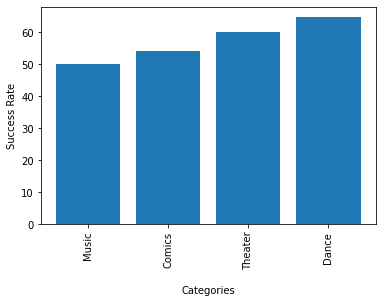


SUBCATEGORY

Success rate of your subcategory (Rock) is 53.24%

Think about other subcategories with higher succeess rate in your main category (of course if applicable!):
Indie Rock - 64.83%
Jazz - 59.7%
Classical Music - 65.1%
Country & Folk - 63.35%
Chiptune - 78.26%


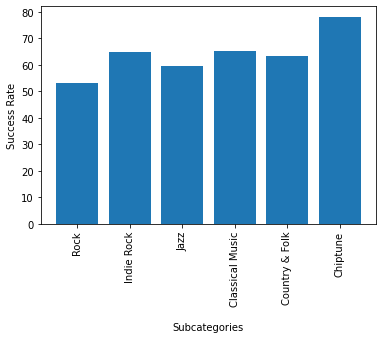


TIME

Success rate of your anticipated time range of 20 - 30 days is 51.02%

Projects in your category with anticipated time range of 0 - 10 days are characterized by success rate of 47.44%.
The result is worse than ours, Let's not go that way 

Projects in your category with anticipated time range of 10 - 20 days are characterized by success rate of 58.12%.
Reconsider decreassing the anticipated time
This might be helpful:
https://www.crowdfundingpr.org/ways-boost-kickstarter-campaign/ 
https://www.kickstarter.com/blog/shortening-the-maximum-project-length/


Projects in your category with anticipated time range of 30 - 40 days are characterized by success rate of 51.29%.
Reconsider increasing the anticipated time 

Projects in your category with anticipated time range of 40 - 50 days are characterized by success rate of 48.78%.
The result is worse than ours, Let's not go that way 

Projects in your category with anticipated time range of 50 - 60 days are characterized by success rat

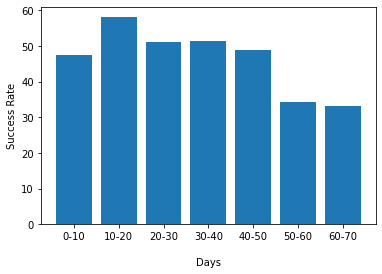


MONEY

Success rate of your anticipated money range of 9000.0 - 20000.0 $ is 43.88%

Projects in your category with anticipated money range of 0 - 1500.0 $ are characterized by success rate of:
 55.75%.
 
Reconsider decreassing the anticipated amount of money to be collected 


Projects in your category with anticipated money range of 1500.0 - 4000.0 $ are characterized by success rate of:
 56.4%.
 
Reconsider decreassing the anticipated amount of money to be collected 


Projects in your category with anticipated money range of 4000.0 - 9000.0 $ are characterized by success rate of:
 51.98%.
 
Reconsider decreassing the anticipated amount of money to be collected 


Projects in your category with anticipated money range of 20000.0 - 25000000 $ are characterized by success rate of:
 25.87%.
The result is worse than ours, Let's not go that way 



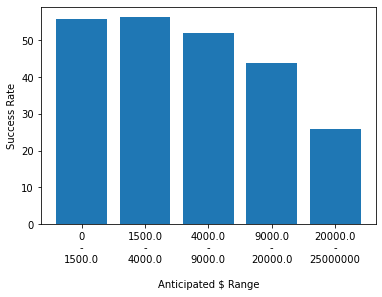

In [31]:
run_button = widgets.Button(
    description='Want to succeed?',
    disabled=False,
    button_style='',
    tooltip='Click me',
    icon='check' 
)

def button_callback(button):
    country_filter = df[df['country']==choice_widget.value]
    #category
    category_filter = country_filter[country_filter['main_category']==main_cat_widget.value]
    success_filter = category_filter[category_filter['state_new']==1]
    a = round(len(success_filter)/len(category_filter)*100,2)
    print('\033[1m'+"CATEGORY\n"+'\033[0m')
    print("Success rate of your category ({}) is {}%\n".format(main_cat_widget.value, a))
    print('\033[1m'+"Think about other categories with higher succeess rate in your country (of course if applicable!):"+'\033[0m')
    list_category= country_filter['main_category'].unique().tolist()
    list_category_graph_x = [main_cat_widget.value]
    list_category_graph_y = [a]
    graph= 0
    for i in list_category:
        category_filter_a = country_filter[country_filter['main_category']==i]
        success_filter_a = category_filter_a[category_filter_a['state_new']==1]
        b = round(len(success_filter_a)/len(category_filter_a)*100,2)
        if b > a:
            graph +=1
            print("{} - {}%".format(i,b))
            list_category_graph_x.append(i)
            list_category_graph_y.append(b)
    if graph > 0:
        x_pos = np.arange(len(list_category_graph_x))   
        plt.bar(list_category_graph_x, list_category_graph_y,align='center')
        plt.xticks(x_pos, list_category_graph_x, rotation=90) 
        plt.ylabel('Success Rate')
        plt.xlabel('\nCategories')
        plt.show()
            
    #sub-category zastanowić się jak połączyć z category bo za dużo
    subcategory_filter = category_filter[category_filter['category']==cat_widget.value]
    success_filter_2 = subcategory_filter[subcategory_filter['state_new']==1]
    c = round(len(success_filter_2)/len(subcategory_filter)*100,2)
    print('\n\033[1m'+"SUBCATEGORY\n"'\033[0m')
    print("Success rate of your subcategory ({}) is {}%\n".format(cat_widget.value, c))
    print('\033[1m'+"Think about other subcategories with higher succeess rate in your main category (of course if applicable!):"+'\033[0m')
    list_subcategory= category_filter['category'].unique().tolist()
    list_subcategory_graph_x = [cat_widget.value]
    list_subcategory_graph_y = [c]
    graph_2= 0
    for i in list_subcategory:
        subcategory_filter_a = category_filter[category_filter['category']==i]
        success_filter_2_a = subcategory_filter_a[subcategory_filter_a['state_new']==1]
        d = round(len(success_filter_2_a)/len(subcategory_filter_a)*100,2)
        if d > c:
            graph_2 +=1
            print("{} - {}%".format(i,d))
            list_subcategory_graph_x.append(i)
            list_subcategory_graph_y.append(d)
    if graph > 0:
        x_pos_2 = np.arange(len(list_subcategory_graph_x))   
        plt.bar(list_subcategory_graph_x, list_subcategory_graph_y,align='center', )
        plt.xticks(x_pos_2, list_subcategory_graph_x, rotation=90) 
        plt.ylabel('Success Rate')
        plt.xlabel('\nSubcategories')
        plt.show()
    #time 29 jako dzielący na przedziały
    interval_list = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

    for start, stop in interval_list:
        if duration_widget.value > start and duration_widget.value <= stop:
            time_y = start
            time_x = stop

    
    time_filter = category_filter[category_filter['duration'].between(time_y, time_x)]
    success_filter_4 = time_filter[time_filter['state_new']==1]
    g = round(len(success_filter_4)/len(time_filter)*100,2)
    print('\n\033[1m'+"TIME\n"'\033[0m')
    
    print("Success rate of your anticipated time range of {} - {} days is {}%\n".format(time_y, time_x, g))
    
#     time_ranges= [(0,28),(29,29),(30,100)]
    better = 0
    list_time_graph_x =[]
    list_time_graph_y =[]
    for index, tuple in enumerate(interval_list):
        time_filter_T = category_filter[category_filter['duration'].between(tuple[0], tuple[1])]
        success_filter_T = time_filter_T[time_filter_T['state_new']==1]
        h = round(len(success_filter_T)/len(time_filter_T)*100,2)
        list_time_graph_x.append("{}-{}".format(tuple[0], tuple[1]))
        list_time_graph_y.append(h)
        if g < h:
            better += 1

            print("Projects in your category with anticipated time range of {} - {} days are characterized by success rate of {}%.".format(tuple[0], tuple[1], h))
            
            if tuple[1] > time_x:
                print('\033[1m'+"Reconsider increasing the anticipated time \n"+'\033[0m')
            elif tuple[1] < time_x:
                print('\033[1m'+"Reconsider decreassing the anticipated time"+'\033[0m')
                print('This might be helpful:\nhttps://www.crowdfundingpr.org/ways-boost-kickstarter-campaign/ \nhttps://www.kickstarter.com/blog/shortening-the-maximum-project-length/\n\n')
                
        elif g == h:
            continue
        else:

            print("Projects in your category with anticipated time range of {} - {} days are characterized by success rate of {}%.".format(tuple[0],tuple[1], h))
            print('\033[1m'+"The result is worse than ours, Let's not go that way \n"+'\033[0m')
    if better == 0:
        print('\033[1m'+"SEEMS THAT YOU SELECTED THE RIGHT RANGE"+'\033[0m')    
    
    x_pos_4 = np.arange(len(list_time_graph_x))   
    plt.bar(list_time_graph_x, list_time_graph_y,align='center')
    plt.xticks(x_pos_4, list_time_graph_x) 
    plt.ylabel('Success Rate')
    plt.xlabel('\nDays')
    plt.show()
    #name    
    #money - użwam 1000 - 10000 - 100000 - wiecej, ale do dyskusji/ kwartyle słabe/ albo od razu 
#     money_Q1 = country_filter['usd_pledged_real'].quantile(0.25)
#     money_Q2 = country_filter['usd_pledged_real'].quantile(0.5)
#     money_Q3 = country_filter['usd_pledged_real'].quantile(0.75)
    amount_list = list(round(country_filter["usd_goal_real"].quantile([0.2, 0.4, 0.6, 0.8]),0))
   
    if money_widget.value < amount_list[0]:
        money_y = 0
        money_x = amount_list[0]
    elif money_widget.value >= amount_list[0] and money_widget.value < amount_list[1]:
        money_y = amount_list[0]
        money_x = amount_list[1]
    elif money_widget.value >= amount_list[1] and money_widget.value < amount_list[2]:
        money_y = amount_list[1]
        money_x = amount_list[2]
    elif money_widget.value >= amount_list[2] and money_widget.value < amount_list[3]:
        money_y = amount_list[2]
        money_x = amount_list[3]  
    elif money_widget.value >= amount_list[3]:
        money_y = amount_list[3]
        money_x = 25000000 
    
#     money_P1 = 1000
#     money_P2 = 10000
#     money_P3 = 100000
#     money_P4 = 25000000
#     if money_widget.value < money_P1:
#         money_y = 0
#         money_x = 1000
#     elif money_widget.value < money_P2:
#         money_y = 1000
#         money_x = 10000
#     elif money_widget.value < money_P3:
#         money_y = 10000
#         money_x = 100000
#     else:
#         money_y = 100000
#         money_x = 25000000

    
    money_filter = category_filter[category_filter['usd_goal_real'].between(money_y, money_x)]
    success_filter_3 = money_filter[money_filter['state_new']==1]
    e = round(len(success_filter_3)/len(money_filter)*100,2)
    print('\n\033[1m'+"MONEY\n"'\033[0m')
    print("Success rate of your anticipated money range of {} - {} $ is {}%\n".format(money_y, money_x, e))
    
    money_ranges= [(0,amount_list[0]),(amount_list[0],amount_list[1]),(amount_list[1],amount_list[2]), (amount_list[2],amount_list[3]),(amount_list[3],25000000) ]
    better = 0
    list_money_graph_x = []
    list_money_graph_y =[]
    for index, tuple in enumerate(money_ranges):
        money_filter_P = category_filter[category_filter['usd_goal_real'].between(tuple[0], tuple[1], inclusive="left")]
        success_filter_P = money_filter_P[money_filter_P['state_new']==1]
        f = round(len(success_filter_P)/len(money_filter_P)*100,2)
        list_money_graph_x.append("{}\n-\n{}".format(tuple[0], tuple[1]))
        list_money_graph_y.append(f)
        if e < f:
            print("Projects in your category with anticipated money range of {} - {} $ are characterized by success rate of:\n {}%.\n ".format(tuple[0], tuple[1], f))
            better += 1
            if tuple[1] > money_x:
                print('\033[1m'+"Reconsider increasing the anticipated amount of money to be collected \n\n"+'\033[0m')
            elif tuple[1] < money_x:
                print('\033[1m'+"Reconsider decreassing the anticipated amount of money to be collected \n\n"+'\033[0m')
        elif e == f:
            continue
        else:
            print("Projects in your category with anticipated money range of {} - {} $ are characterized by success rate of:\n {}%.".format(tuple[0], tuple[1], f))
            print('\033[1m'+"The result is worse than ours, Let's not go that way \n"+'\033[0m')
    if better == 0:
        print('\033[1m'+"SEEMS THAT YOU SELECTED THE RIGHT RANGE"+'\033[0m')
    
    x_pos_3 = np.arange(len(list_money_graph_x))   
    plt.bar(list_money_graph_x, list_money_graph_y,align='center')
    plt.xticks(x_pos_3, list_money_graph_x) 
    plt.ylabel('Success Rate')
    plt.xlabel('\nAnticipated $ Range')
    plt.show()
      

    
    
run_button.on_click(button_callback)
display(run_button)